In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
speed_of_light = 299792.458
path = '../Data/023/Lev5/' #path for the simulation
extrapolation_order = 4
savefig = False

alm = []
H2 = []

input_file1 = h5py.File(path+'rhOverM_Asymptotic_GeometricUnits.h5','r')
SXS = input_file1['Extrapolated_N%i.dir'%(extrapolation_order)]['Y_l%i_m%i.dat'%(2,-1)]
t = SXS[:,0]
dt = np.diff(t)

def ALM(l,m):
    #print("lol",l,m)
    if m>l or m<-l or l<2 or l>8:
        return 0
    return alm[l-2][m+l]
def Hcomp(l,m):
    if m>l or m<-l or l<2 or l>8:
        return 0
    return H2[l-2][m+l]
def norm(vector):
    return np.sqrt(vector[0]*vector[0]+vector[1]*vector[1]+vector[2]*vector[2])

meta = open(path+'metadata.txt','r')
for line in meta:
    line = line.translate(None,",")
    line = line.split()
    if(len(line)<2):
        continue;
    var = line[0].translate(None," ")
    if var == 'simulation-name':
         simulation_name= line[2]    
    if var == 'initial-ADM-energy':
        initial_mass = float(line[2])
    if var == 'initial-ADM-linear-momentum':
        initial_p = np.array([float(line[2]),float(line[3]),float(line[4])])
    if var == 'initial-ADM-angular-momentum':
        initial_j = np.array([float(line[2]),float(line[3]),float(line[4])])
    if var == 'remnant-mass':
        remnant_mass = float(line[2])
    if var == 'remnant-spin':
        remnant_spin = np.array([float(line[2]),float(line[3]),float(line[4])])
    if var == 'initial-mass1':
        initial_mass1 = float(line[2])
    if var == 'initial-mass2':
        initial_mass2 = float(line[2])
    if var == 'initial-spin1':
        initial_spin1 = np.array([float(line[2]),float(line[3]),float(line[4])])
    if var == 'initial-spin2':
        initial_spin2 = np.array([float(line[2]),float(line[3]),float(line[4])])
    if var == 'alternative-names':
         alt_name = line[2]
    
        
#The following are coefficients used in calculations of radiated angular and linear momentum       
def f(l,m):
    return np.sqrt((l-m)*(l+m+1))
def a(l,m):
    return np.sqrt((1.0+0j)*(l-m)*(l+m+1.0))/(l*(l+1.0))
def b(l,m):
    return (np.sqrt((1+0j)*(l-2.0)*(l+2.0)*(l+m)*(l+m-1.0)/(2.0*l-1.0)/(2.0*l+1.0)))/(2.0*l)
def c(l,m):
    return 2.0*m/(l*(l+1.0))
def d(l,m):
    return (np.sqrt((1.0+0j)*(l-2.0)*(l+2.0)*(l-m)*(l+m)/(2.0*l-1.0)/(2.0*l+1)))/l

#Calculates the H and Hdots to be used for further analysis.
for l in range(2,9):
    alm.append([])
    H2.append([])
    for m in range(-l,l+1):
        SXS = input_file1['Extrapolated_N2.dir']['Y_l%i_m%i.dat'%(l,m)]
        H = SXS[:,1]+(0+1j)*SXS[:,2]
        t = SXS[:,0]
        Hdot = np.diff(H)/np.diff(t)
        alm[l-2].append(Hdot)
        H2[l-2].append(H[1:])     
    

    

In [8]:
#This calculates dE/dt where E is the energy radiated
de = 0
for l in range(2,9):
    for m in range(-l,l+1):
        de = de + ALM(l,m)*np.conj(ALM(l,m))
E = np.cumsum(de*dt)/(16*np.pi) #Calculates the total energy by integrating over the time
Radiated_Energy = E[-1] #The energy radiated away at the end of the simulation
final_mass = np.real(initial_mass - Radiated_Energy) #Calculates the Remnant mass of the blackhole formed after the merger

Mass Ratio: 1.49999999015
Initial Spin1: [  1.79999999e-01  -1.18359719e-11  -6.53914796e-12]
Initial Spin2: [ -7.26510406e-12  -8.00000006e-02   1.63736001e-12]
Final Mass of Blackhole Calculated : 0.953745059996
Error from Horizon Data : 0.0243588117413 %


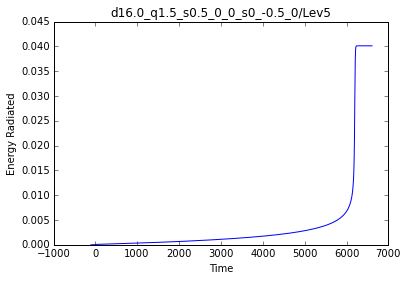

In [9]:
print("Mass Ratio: {}".format(initial_mass1/initial_mass2))
print("Initial Spin1: {}".format(initial_spin1))
print("Initial Spin2: {}".format(initial_spin2))
print("Final Mass of Blackhole Calculated : {}".format(final_mass))
print("Error from Horizon Data : {} %".format(np.abs(((final_mass-remnant_mass)/remnant_mass)*100)))

plt.figure(1)
plt.title(simulation_name)
plt.xlabel("Time")
plt.ylabel("Energy Radiated")
plt.plot(t[1:],np.real(E))
if(savefig):
    plt.savefig('images/'+alt_name +'_E')
plt.show()

